In [205]:
#importing
from pylab import *

import urllib2

from pprint import pprint

import matplotlib.tri as Tri
import datetime
import time
import sys
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [206]:
#getting the real track data
turl = 'http://opendap.renci.org:1935/thredds/fileServer/Experiments/Isabel_ex1/tracks/2003_Isabel.hur'
resp = urllib2.urlopen(turl)
#print resp.read()

resp = urllib2.urlopen(turl)
mat = np.zeros((57,9))
x=0
for line in resp:
    lists = line.split()
    arrays = np.asarray(lists[0:9:1], dtype = np.float)
    mat[x,:] = arrays
    x=x+1

track = np.zeros((57,2))
track[:,0] = mat[:,4] #lat
track[:,1] = mat[:,5] #lon
track[:,1] = track[:,1]*-1



In [207]:
#getting the url for the files
def getURL (ensemble):
    url_base='http://opendap.renci.org:1935/thredds/fileServer/Experiments/Isabel_ex1/tracks/Isabel_ex1_12km_n%02d.trk'
    url=url_base % ensemble
    return url

#Getting the files
def getFile (url):
    response = urllib2.urlopen(url)
    return response

#reading out the info
def getInfo (files):
    film = np.zeros((721,10))
    x=0
    for line in files:
        if line.startswith('#'):
            continue
        lists = line.split()
        arrays = np.asarray(lists, dtype = np.float)
        film[x,:] = arrays
        x=x+1
    return film

In [208]:
totalens = 20
size = (5,721,totalens)
multi = np.zeros(size)
ens = 1

for ens in range(0,totalens):
    url = getURL(ens+1)
    files = getFile(url)
    info = getInfo(files)
    multi[0,:,ens] = info[:,5] #lon
    multi[1,:,ens] = info[:,6] #lat
    multi[2,:,ens] = info[:,7] #Pmin(mb)
    multi[3,:,ens] = info[:,8] #Rmax (km)
    multi[4,:,ens] = info[:,9] #Vmax (m/s)

#reading = getFile(url)
#print reading.read()


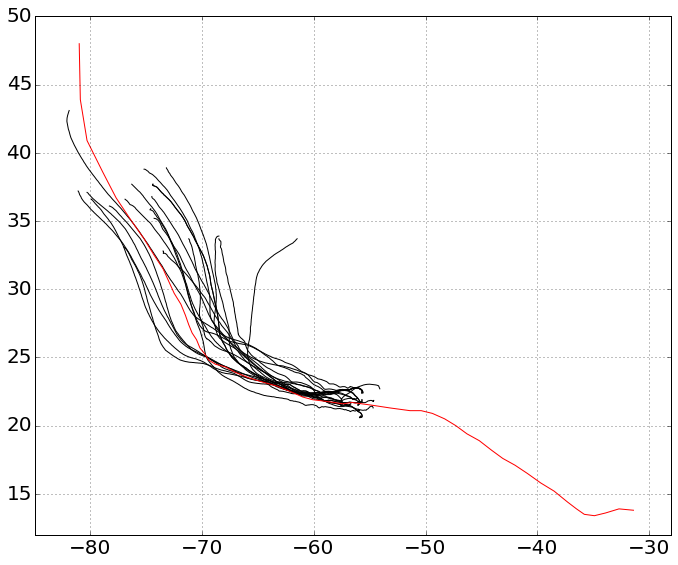

In [209]:
fig = plt.figure(figsize=(18,9), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0/np.cos(35 * np.pi / 180.0))

plt.grid(True)
plt.xlim((-85,-28))
plt.ylim((12,50))
plt.tick_params(axis='both', which='major', labelsize=20)
for ens in range (0,totalens):
    plt.plot(multi[0,:,ens],multi[1,:,ens], color = 'k')
plt.plot(track[:,1],track[:,0], color = 'r')

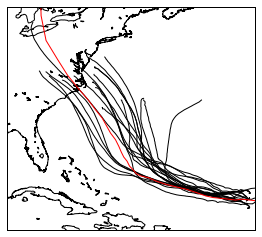

In [210]:
llcrnrlon=-85  # lower-left corner, lon
llcrnrlat=18 # lower-left corner, lat
urcrnrlon=-55  # upper-right corner, lon
urcrnrlat=45   # upper-right corner, lat

m = Basemap(llcrnrlon=-85,
            llcrnrlat=18,
            urcrnrlon=-55,
            urcrnrlat=45, resolution = 'i')

m.drawcoastlines(linewidth=1.)

for ens in range (0,totalens):
    lon = multi[0,:,ens]
    lat = multi[1,:,ens]
    mlon,mlat = m(lon,lat)
    m.plot(mlon,mlat,color = 'k')
m.plot(track[:,1],track[:,0], color = 'r')

    
    

In [211]:
#prepping to get errors
#getting only the data for days that the WRF tracks follow
comp = np.zeros((31,2))
comp[:,0] = mat[24:55:1,4] #lat
comp[:,1] = mat[24:55:1,5]*-1 #lon


#getting only the hourly estimates from the WRF tracks
enscomp = np.zeros((5,31,totalens))
for ens in range(0,totalens):
    enscomp[0,:,ens] = multi[0,0:721:24,ens] #lon
    enscomp[1,:,ens] = multi[1,0:721:24,ens] #lat
    enscomp[2,:,ens] = multi[2,0:721:24,ens]
    enscomp[3,:,ens] = multi[3,0:721:24,ens]
    enscomp[4,:,ens] = multi[4,0:721:24,ens]

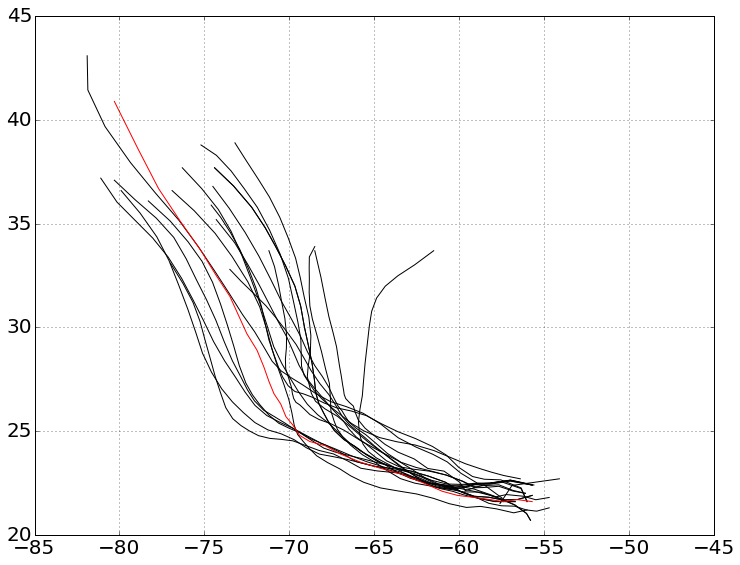

In [245]:
#plotting the condensed data for comparison
fig = plt.figure(figsize=(18,9), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0/np.cos(35 * np.pi / 180.0))

plt.grid(True)
plt.xlim((-85,-45))
plt.ylim((20,45))
plt.tick_params(axis='both', which='major', labelsize=20)
for ens in range (0,totalens):
    plt.plot(enscomp[0,:,ens],enscomp[1,:,ens], color = 'k')
plt.plot(comp[:,1],comp[:,0], color = 'r')

In [244]:
#comparing
comparing = np.zeros((5,31,totalens))
lon = np.zeros((31,totalens))
for ens in range (0,totalens):
    lon[:,ens] = comp[:,1]
#f=pprint(lon,indent=1)
comparing[0,:,:]=enscomp[0,:,:]-lon
trial = comparing.astype(float16)
g=pprint(trial[0,:,:])
for ens in range (0,totalens)


array([[  0.00000000e+00,  -9.99755859e-02,   1.59960938e+00,
         -3.99902344e-01,  -3.00048828e-01,   1.00000000e+00,
         -1.00000000e+00,  -3.00048828e-01,  -7.00195312e-01,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   9.99755859e-02,
          0.00000000e+00,  -9.99755859e-02,  -3.99902344e-01,
         -3.00048828e-01,  -1.00000000e+00],
       [  2.99987793e-02,   5.60058594e-01,  -2.90039062e-01,
         -2.29980469e-01,   2.39990234e-01,   1.11035156e+00,
         -1.29980469e+00,  -1.89941406e-01,  -7.79785156e-01,
          1.16015625e+00,   2.99987793e-02,  -3.89892578e-01,
         -3.89892578e-01,  -3.89892578e-01,  -3.79882812e-01,
         -3.99902344e-01,   5.69824219e-01,  -2.29980469e-01,
          2.50000000e-01,  -1.30957031e+00],
       [ -1.00021362e-02,   6.89941406e-01,  -1.99951172e-01,
         -2.70019531e-01,  -1.60034180e-01,   1.17968750e+00,
         -1.53027344e+00,  -3.99902344e-01